In [10]:
# -------------------- Code for Question 8.2 -----------------------------
# Clear environment

rm(list = ls())


# Setting the random number generator seed so that our results are reproducible
# (Your solution doesn't need this, but it's usually good practice to do)


set.seed(1)


,M,So,Ed,Po1,Po2,LF,M.F,Pop,NW,U1,U2,Wealth,Ineq,Prob,Time,Crime
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>
1,15.1,1,9.1,5.8,5.6,0.510,95.0,33,30.1,0.108,4.1,3940,26.1,0.084602,26.2011,791
2,14.3,0,11.3,10.3,9.5,0.583,101.2,13,10.2,0.096,3.6,5570,19.4,0.029599,25.2999,1635
3,14.2,1,8.9,4.5,4.4,0.533,96.9,18,21.9,0.094,3.3,3180,25.0,0.083401,24.3006,578
4,13.6,0,12.1,14.9,14.1,0.577,99.4,157,8.0,0.102,3.9,6730,16.7,0.015801,29.9012,1969
5,14.1,0,12.1,10.9,10.1,0.591,98.5,18,3.0,0.091,2.0,5780,17.4,0.041399,21.2998,1234
6,12.1,0,11.0,11.8,11.5,0.547,96.4,25,4.4,0.084,2.9,6890,12.6,0.034201,20.9995,682



Call:
lm(formula = Crime ~ ., data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-395.74  -98.09   -6.69  112.99  512.67 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5.984e+03  1.628e+03  -3.675 0.000893 ***
M            8.783e+01  4.171e+01   2.106 0.043443 *  
So          -3.803e+00  1.488e+02  -0.026 0.979765    
Ed           1.883e+02  6.209e+01   3.033 0.004861 ** 
Po1          1.928e+02  1.061e+02   1.817 0.078892 .  
Po2         -1.094e+02  1.175e+02  -0.931 0.358830    
LF          -6.638e+02  1.470e+03  -0.452 0.654654    
M.F          1.741e+01  2.035e+01   0.855 0.398995    
Pop         -7.330e-01  1.290e+00  -0.568 0.573845    
NW           4.204e+00  6.481e+00   0.649 0.521279    
U1          -5.827e+03  4.210e+03  -1.384 0.176238    
U2           1.678e+02  8.234e+01   2.038 0.050161 .  
Wealth       9.617e-02  1.037e-01   0.928 0.360754    
Ineq         7.067e+01  2.272e+01   3.111 0.003983 ** 
Prob        -4.855e+03

$names
 [1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"        

$class
[1] "lm"

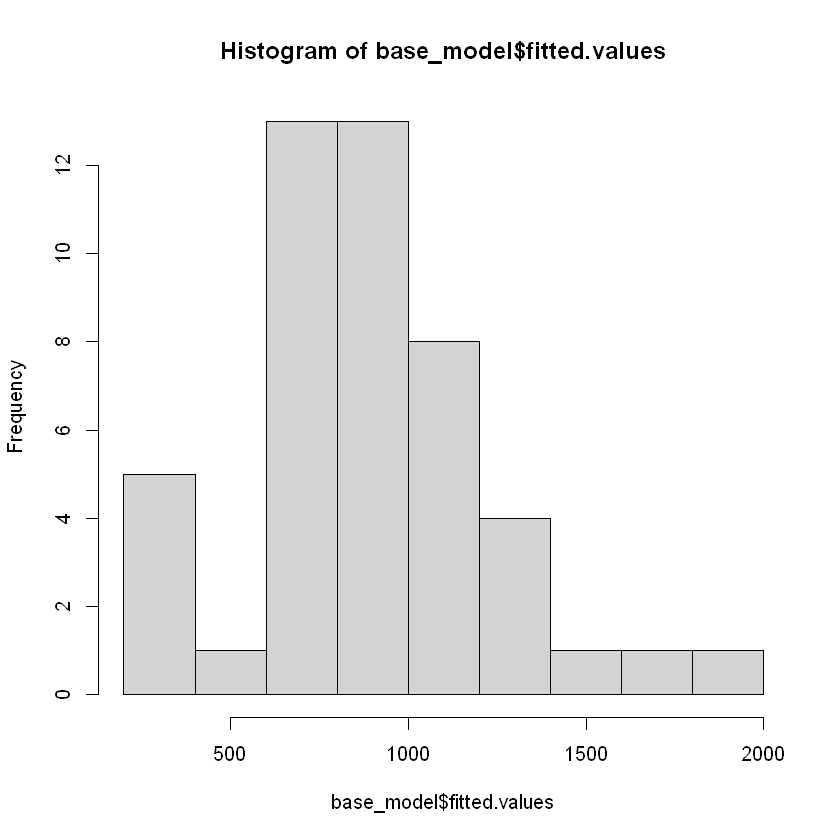

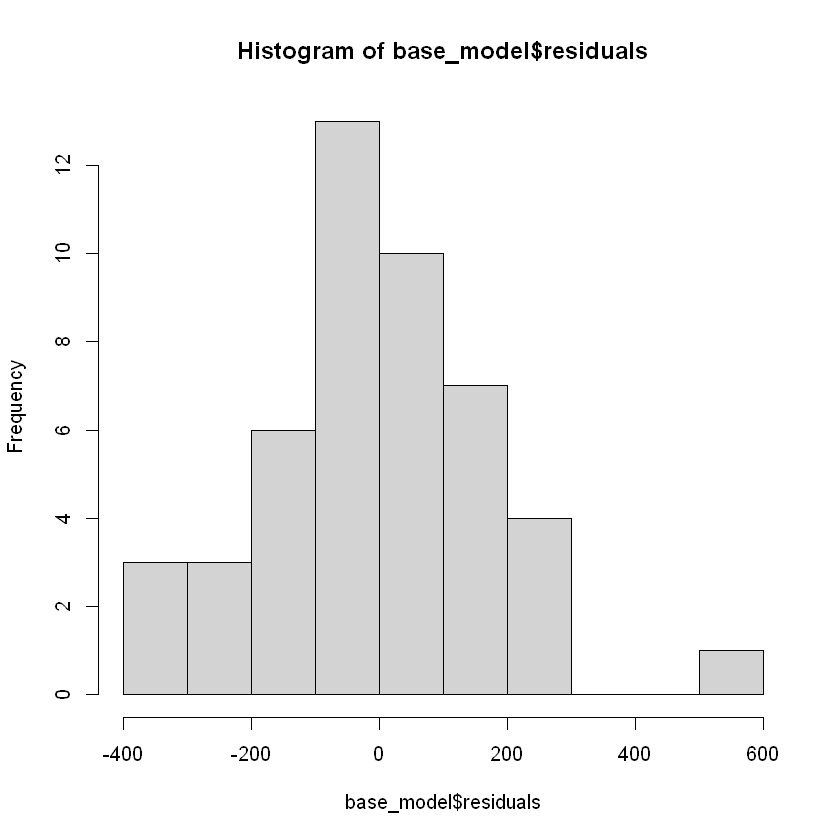

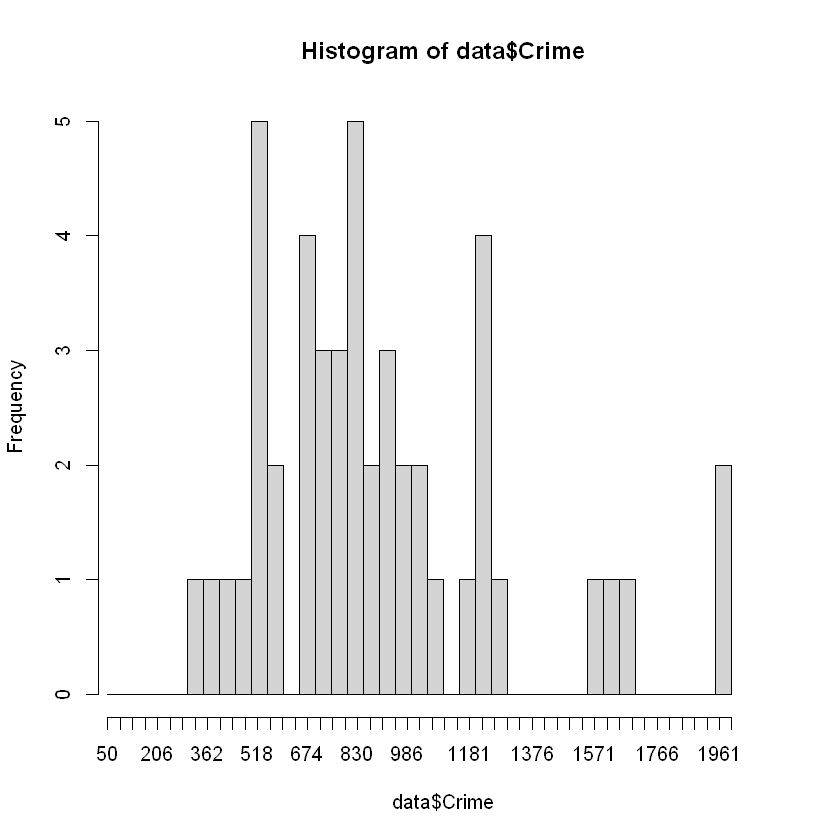

In [11]:
# ---------------------------- Data manipulation -------------------------------------

#First, Read in the data
#
data <- read.table("C:/Users/ateje/Downloads/hw5_solutions-SP22/uscrime.txt", stringsAsFactors = FALSE, header = TRUE)

# optional check to make sure the data is read correctly
head(data)

# Crime is dependent variable, other variables are predictors or independent variables

#Attempt #1: Using whhole dataset to build regression model which is then used to predict.
#            and we're not bothering to estimate model quality (so test data isn't needed) 


base_model = lm( Crime ~ ., data = data)

#Summary of the base_model

summary(base_model)
attributes(base_model)
hist(base_model$fitted.values)
hist(base_model$residuals)
hist(data$Crime, xlim = c(100,2100), breaks = seq(50,2000,50), xaxp = c(50, 2000, 50))





1) It's important that the residuals are equally distributed and have normal variance so we plot them.
2) I also plot Crime as a histogram to better understant how good or bad my model prediction is. It looks like the lowest crime rate isjust over 300 in at least 1 county. 

In [12]:


#Create the test datapoint manually using dataframe
#This data point will be used to test the model (ln()).

test <-data.frame(M = 14.0,So = 0, Ed = 10.0, Po1 = 12.0, Po2 = 15.5,LF = 0.640, M.F = 94.0, Pop = 150, NW = 1.1, U1 = 0.120, U2 = 3.6, Wealth = 3200, Ineq = 20.1, Prob = 0.040,Time = 39.0) # nolint


#Predict the crime rate for test data point

base_model_prediction <- predict(base_model, test)
base_model_prediction

## 155.4349 

1 
155.4349

Result: 155.43

This estimate is less than half of the crime rate in the next lowest city as shown in the histogram earlier.  

This is terrible and a sign of overfitting given how good the initial model results were (Adjusted R-squared = 0.70; normally distributed residualls with + or - 100 in variability)

Overfitting in this case is also a direct result of the ratio of data points to factors. This ratio is 3:1 and you would want something around 10:1. Insignificant factors need to be removed, and I will do so using cross-validation and the RFE (Recursive Feature Elimination Method) in the caret package.


In [13]:
#x <- select(data, -Crime)

# Target variable
#y <- data$Crime

# Training: 80%; Test: 20%
#set.seed(100122)
#training_set <- createDataPartition(y, p = .80, list = FALSE)

#x_training_set <- x[ training_set, ]
#x_testing_set  <- x[-training_set, ]

#y_training_set <- y[ training_set]
#y_testing_set  <- y[-training_set]



gdfgdfgf


Recursive feature selection

Outer resampling method: Cross-Validated (10 fold, repeated 25 times) 

Resampling performance over subset size:

 Variables  RMSE Rsquared   MAE RMSESD RsquaredSD  MAESD Selected
         1 359.8   0.3149 291.4 130.60     0.2863 100.11         
         2 343.6   0.3268 274.6 130.04     0.2889 104.74         
         3 347.2   0.3168 279.7 129.43     0.2871 106.88         
         4 333.2   0.4153 276.2  97.35     0.3176  86.28         
         5 323.8   0.4735 264.9  97.00     0.3283  86.96         
         6 309.9   0.4995 255.0  95.13     0.3268  85.28         
         7 315.7   0.4962 261.1  95.94     0.3227  83.27         
         8 273.8   0.5706 225.9  88.19     0.3026  75.86         
         9 240.9   0.6298 195.5  99.00     0.2915  82.16         
        10 233.5   0.6500 190.3  85.82     0.2674  69.25        *
        11 240.7   0.6213 195.0  92.33     0.2815  72.39         
        12 253.3   0.5891 204.7  92.36     0.2962  74.54        

[1] "U1"   "Prob" "LF"   "Po1"  "Ed"   "U2"   "Po2"  "M"    "Ineq" "So"

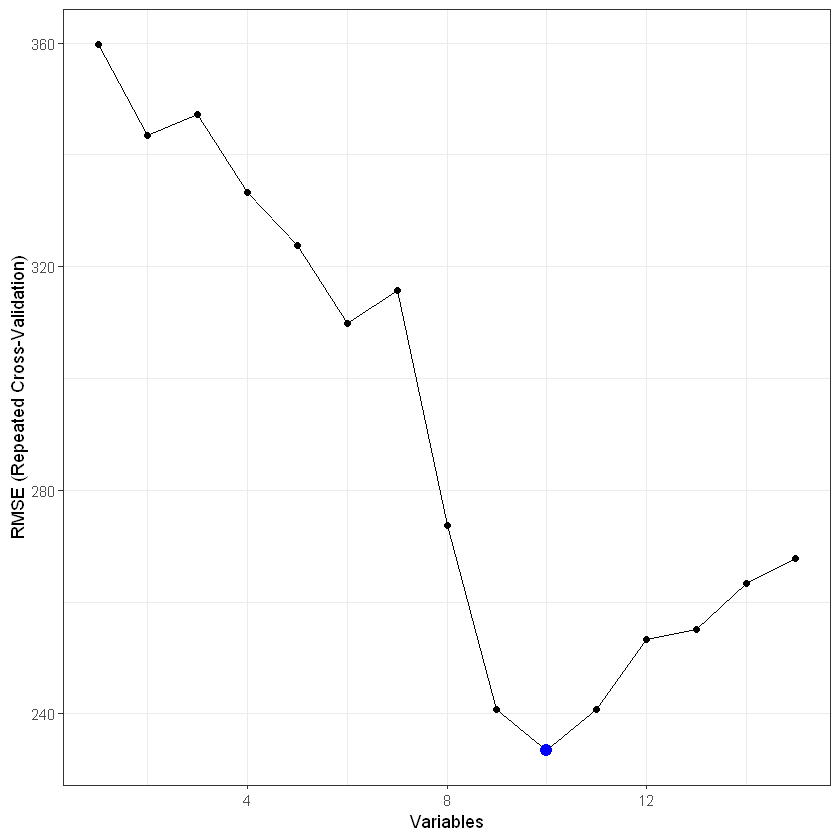

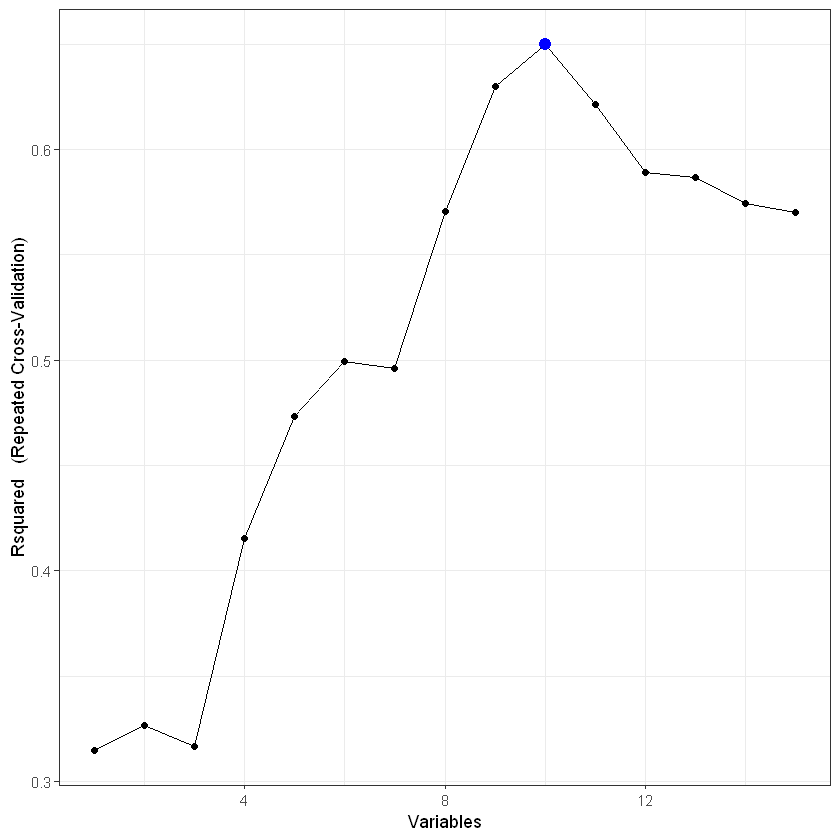

In [14]:
set.seed(1000)

library(caret)

control <- rfeControl(functions = lmFuncs,
                     method = "repeatedcv",
                     number = 10, #number of folds
                     repeats = 25, #repeats 25 times
                     verbose = FALSE)

#lm_rfe = rfe(x = x_training_set, 
#             y = y_training_set,
#             sizes = c(1:15), #this tells the function to try all possible solitions
                             #(i.e, only 1 feature, only 2 features,..., only 3 features, etc) 
#             rfeControl = control)


lm_rfe <- rfe(data[,-16], data[[16]],
                 sizes = c(1:15),
                 rfeControl = control)
#Print the results
lm_rfe  

# Post prediction
#postResample(predict(lm_rfe, x_testing_set), y_testing_set)

#Print the selected critical predictors
predictors(lm_rfe)


# Print the results visually
ggplot(data = lm_rfe, metric = "RMSE") + theme_bw()
ggplot(data = lm_rfe, metric = "Rsquared  ") + theme_bw()

In [15]:
#postResample(predict(lm_rfe, x_testing_set), y_testing_set)

predict(lm_rfe,test)

1 
870.6834

What these results are telling me is that this is not a good model compared to the one here (https://towardsdatascience.com/effective-feature-selection-recursive-feature-elimination-using-r-148ff998e4f7#:~:text=Recursive%20Feature%20Elimination%C2%B2%2C%20or%20shortly,the%20optimal%20combination%20of%20features) I am using as reference. Maybe has something to do with the ration of data points to features???

In [ ]:
intercept = lm_model1$coefficients[1]

beta_vector = lm_model1$coefficients[2:(principal_components+1)]
beta_vector

data_pca$rotation[,1:principal_components]
alpha_vector = data_pca$rotation[,1:principal_components] %*% beta_vector
alpha_vector

#mean and standard deviations of original raw data. 
mean = sapply(data[,1:15], mean)
sdev = sapply(data[,1:15], sd)

original_alpha = alpha_vector/ sdev
original_beta = intercept - sum(alpha_vector*mean/sdev) #Or original intercept 

original_alpha
original_beta

In [ ]:
estimated_values <- as.matrix(data[,1:15]) %*% original_alpha + original_beta

SSE = sum((estimated_values - data[,16])^2)
SStot = sum((data[,16] - mean(data[,16]))^2)
R2 = 1 - SSE/SStot

R2_adjust = R2 - (1-R2)*principal_components/(nrow(data)-principal_components-1)

R2
R2_adjust 